## Библиотеки

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm.notebook import tqdm
import time
#from pathlib import Path
import glob
import re
from bs4 import BeautifulSoup
import requests
from ast import literal_eval
from collections import OrderedDict
from random import sample 
import warnings
warnings.filterwarnings("ignore")

## Загрузка файлов 1 способ

In [2]:
df1 = pd.read_csv('habr_310000_320000.csv')

In [3]:
n1 = range(320000, 540000, 10000)

#### До 55000

In [4]:
%%time
for i in tqdm(n1):
    df = pd.read_csv('habr_{0}_{1}.csv'.format(i, i+10000))
    df1 = pd.concat([df1, df])
    print('Загрузили habr_{0}_{1}.csv'.format(i, i+10000))
print('Success! Загрузили датафрейм с {0} числом строк'.format(len(df1)))

  0%|          | 0/22 [00:00<?, ?it/s]

Загрузили habr_320000_330000.csv
Загрузили habr_330000_340000.csv
Загрузили habr_340000_350000.csv
Загрузили habr_350000_360000.csv
Загрузили habr_360000_370000.csv
Загрузили habr_370000_380000.csv
Загрузили habr_380000_390000.csv
Загрузили habr_390000_400000.csv
Загрузили habr_400000_410000.csv
Загрузили habr_410000_420000.csv
Загрузили habr_420000_430000.csv
Загрузили habr_430000_440000.csv
Загрузили habr_440000_450000.csv
Загрузили habr_450000_460000.csv
Загрузили habr_460000_470000.csv
Загрузили habr_470000_480000.csv
Загрузили habr_480000_490000.csv
Загрузили habr_490000_500000.csv
Загрузили habr_500000_510000.csv
Загрузили habr_510000_520000.csv
Загрузили habr_520000_530000.csv
Загрузили habr_530000_540000.csv
Success! Загрузили датафрейм с 93048 числом строк
CPU times: total: 40.8 s
Wall time: 42.2 s


In [5]:
df1.describe()

,id,bookmarks,comments_count,views,votes,possitive_votes,negative_votes,reading_time,author_id,karma,karma_votes,rating
count,93048.000000,93048.000000,93048.000000,9.304800e+04,93048.000000,93048.000000,93048.000000,93045.000000,9.304800e+04,93048.000000,93048.000000,93048.000000
mean,424535.811474,52.652652,36.266884,2.124376e+04,20.410025,23.702261,3.292236,6.164017,8.539305e+05,200.621120,575.990553,39.749885
std,66050.512495,81.716262,80.913995,4.143355e+04,25.727409,26.670846,5.890939,5.760165,7.787312e+05,336.709106,956.054745,98.596935
min,310000.000000,0.000000,0.000000,1.840000e+02,-103.000000,0.000000,0.000000,1.000000,1.000000e+00,-118.000000,0.000000,-23.400000
25%,369791.500000,13.000000,4.000000,5.885000e+03,8.000000,10.000000,0.000000,3.000000,6.275000e+04,11.000000,30.000000,0.000000
50%,422880.000000,28.000000,12.000000,1.161300e+04,14.000000,17.000000,2.000000,5.000000,7.070730e+05,48.000000,130.000000,0.000000
75%,478110.500000,62.000000,34.000000,2.279900e+04,25.000000,28.000000,4.000000,8.000000,1.467804e+06,212.000000,652.000000,0.300000
max,539998.000000,3813.000000,2545.000000,5.594334e+06,1447.000000,1450.000000,228.000000,127.000000,2.587253e+06,1820.000000,4239.000000,431.400000


#### После 55000

In [6]:
n2 = range(560000, 550000, 10000)

In [7]:
%%time
for i in tqdm(n1):
    df = pd.read_csv('habr_{0}_{1}.csv'.format(i, i+10000))
    df1 = pd.concat([df1, df])
    print('Загрузили habr_{0}_{1}.csv'.format(i, i+10000))
print('Success! Загрузили датафрейм с {0} числом строк'.format(len(df1)))

  0%|          | 0/22 [00:00<?, ?it/s]

Загрузили habr_320000_330000.csv
Загрузили habr_330000_340000.csv
Загрузили habr_340000_350000.csv
Загрузили habr_350000_360000.csv
Загрузили habr_360000_370000.csv
Загрузили habr_370000_380000.csv
Загрузили habr_380000_390000.csv
Загрузили habr_390000_400000.csv
Загрузили habr_400000_410000.csv
Загрузили habr_410000_420000.csv
Загрузили habr_420000_430000.csv
Загрузили habr_430000_440000.csv
Загрузили habr_440000_450000.csv
Загрузили habr_450000_460000.csv
Загрузили habr_460000_470000.csv
Загрузили habr_470000_480000.csv
Загрузили habr_480000_490000.csv
Загрузили habr_490000_500000.csv
Загрузили habr_500000_510000.csv
Загрузили habr_510000_520000.csv
Загрузили habr_520000_530000.csv
Загрузили habr_530000_540000.csv
Success! Загрузили датафрейм с 182116 числом строк
CPU times: total: 42.3 s
Wall time: 43.4 s


## Загрузка файлов 2 способ (универсальный)

In [2]:
filenames = glob.glob("*.csv")
filenames

['habr_310000_320000.csv',
 'habr_320000_330000.csv',
 'habr_330000_340000.csv',
 'habr_340000_350000.csv',
 'habr_350000_360000.csv',
 'habr_360000_370000.csv',
 'habr_370000_380000.csv',
 'habr_380000_390000.csv',
 'habr_390000_400000.csv',
 'habr_400000_410000.csv',
 'habr_410000_420000.csv',
 'habr_420000_430000.csv',
 'habr_430000_440000.csv',
 'habr_440000_450000.csv',
 'habr_450000_460000.csv',
 'habr_460000_470000.csv',
 'habr_470000_480000.csv',
 'habr_480000_490000.csv',
 'habr_490000_500000.csv',
 'habr_500000_510000.csv',
 'habr_510000_520000.csv',
 'habr_520000_530000.csv',
 'habr_530000_540000.csv',
 'habr_540000_550000.csv',
 'habr_560000_570000.csv',
 'habr_570000_580000.csv',
 'habr_580000_590000.csv',
 'habr_590000_599115.csv',
 'habr_600000_610000.csv',
 'habr_610000_620000.csv',
 'habr_620000_630000.csv',
 'habr_630000_640000.csv',
 'habr_640000_650000.csv',
 'habr_650000_660000.csv',
 'habr_660000_670000.csv',
 'habr_670000_680000.csv',
 'habr_680000_690000.csv',
 

In [3]:
%%time
dfs = []
for filename in tqdm(filenames):
    dfs.append(pd.read_csv(filename))
big_frame = pd.concat(dfs, ignore_index=True)
print('Success! Загрузили датафрейм с {0} числом строк'.format(len(big_frame)))

  0%|          | 0/46 [00:00<?, ?it/s]

Success! Загрузили датафрейм с 170548 числом строк
CPU times: total: 1min 9s
Wall time: 1min 12s


In [8]:
big_frame.describe()

,id,bookmarks,comments_count,views,votes,possitive_votes,negative_votes,reading_time,author_id,karma,karma_votes,rating
count,170548.000000,170548.000000,170548.000000,1.705480e+05,170548.000000,170548.000000,170548.000000,170545.000000,1.704790e+05,170479.000000,170479.000000,170479.000000
mean,536458.999871,40.544035,28.932389,1.568895e+04,17.645595,20.407586,2.761991,5.876848,1.319405e+06,178.411482,485.806492,53.646778
std,139828.140745,69.025450,72.161543,3.369037e+04,25.657524,26.786202,5.678293,5.642832,1.045420e+06,296.348375,788.074011,104.431554
min,310000.000000,0.000000,0.000000,1.900000e+01,-194.000000,0.000000,0.000000,1.000000,1.000000e+00,-118.000000,0.000000,-67.000000
25%,413614.500000,6.000000,2.000000,3.274750e+03,5.000000,7.000000,0.000000,2.000000,2.310130e+05,11.000000,30.000000,0.000000
50%,521709.000000,21.000000,8.000000,7.620000e+03,11.000000,13.000000,1.000000,4.000000,1.249256e+06,53.000000,150.000000,0.000000
75%,675408.500000,48.000000,25.000000,1.686100e+04,21.000000,24.000000,3.000000,8.000000,2.176401e+06,204.000000,599.000000,53.500000
max,773144.000000,3813.000000,2934.000000,5.594334e+06,1447.000000,1450.000000,343.000000,127.000000,3.866976e+06,1820.000000,4240.000000,431.400000


In [9]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170548 entries, 0 to 170547
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               170548 non-null  int64  
 1   is_corporative   170548 non-null  bool   
 2   posttype         170548 non-null  object 
 3   title            170547 non-null  object 
 4   hubs_pro         170548 non-null  object 
 5   hubs_nopro       170548 non-null  object 
 6   tags             170548 non-null  object 
 7   time_published   170548 non-null  object 
 8   bookmarks        170548 non-null  int64  
 9   comments_count   170548 non-null  int64  
 10  views            170548 non-null  int64  
 11  votes            170548 non-null  int64  
 12  possitive_votes  170548 non-null  int64  
 13  negative_votes   170548 non-null  int64  
 14  reading_time     170545 non-null  float64
 15  lang             170548 non-null  object 
 16  author_name      170479 non-null  obje

In [10]:
big_frame.head()

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,possitive_votes,negative_votes,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"[{'id': '221', 'alias': 'sys_admin', 'type': '...","[{'id': '18710', 'alias': 'okmeter', 'type': '...","cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,42,1,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,"<div xmlns=""http://www.w3.org/1999/xhtml""><p><..."
1,310002,True,article,Войны гипервизоров: To be continued,"[{'id': '6398', 'alias': 'it-infrastructure', ...","[{'id': '17352', 'alias': 'cloud4y', 'type': '...","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,12,12,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"<div xmlns=""http://www.w3.org/1999/xhtml""><p>В..."
2,310006,False,article,AdBlock Plus совершил новый виток в истории «п...,"[{'id': '20704', 'alias': 'web_monetization', ...",[],"adblock plus,блокировка рекламы,медийная рекла...",2016-09-14T14:26:49+00:00,35,83,...,37,1,8.0,ru,semen_grinshtein,925306.0,41.0,455.0,0.0,"<div xmlns=""http://www.w3.org/1999/xhtml""><img..."
3,310008,True,article,Миф о незрелости мобильных NFC технологий,"[{'id': '50', 'alias': 'infosecurity', 'type':...","[{'id': '19765', 'alias': 'gemaltorussia', 'ty...","Gemalto,nfc,мобильные приложения,мобильный пла...",2016-09-15T08:02:54+00:00,12,8,...,12,3,2.0,ru,GemaltoRussia,1185068.0,3.0,3.0,0.0,"<div xmlns=""http://www.w3.org/1999/xhtml"">Совр..."
4,310014,True,article,OpenJDK: Project Panama,"[{'id': '359', 'alias': 'programming', 'type':...","[{'id': '18226', 'alias': 'jugru', 'type': 'co...","joker2016,jokerconf,java,jvm,panama",2016-09-15T06:30:51+00:00,50,12,...,36,2,9.0,ru,jetliner,433372.0,16.0,16.0,0.0,"<div xmlns=""http://www.w3.org/1999/xhtml""><img..."


## Извлечение текста

In [11]:
big_frame_text = big_frame.copy()

In [12]:
big_frame['hubs_pro'][0]

"[{'id': '221', 'alias': 'sys_admin', 'type': 'collective', 'title': 'System administration', 'titleHtml': 'System administration', 'isProfiled': True, 'relatedData': None}, {'id': '19197', 'alias': 'dwh', 'type': 'collective', 'title': 'Data storage', 'titleHtml': 'Data storage', 'isProfiled': True, 'relatedData': None}, {'id': '20788', 'alias': 'devops', 'type': 'collective', 'title': 'DevOps', 'titleHtml': 'DevOps', 'isProfiled': True, 'relatedData': None}]"

#### Функция для извлечения текста хабов

In [13]:
def extract_text_after_titleHtml(text):
    pattern = r"'titleHtml': '([^']+)'"
    matches = re.findall(pattern, text)
    return matches
result = extract_text_after_titleHtml(big_frame['hubs_pro'][0])
print(result)

['System administration', 'Data storage', 'DevOps']


#### Извлечение текста хабов про

In [14]:
for i in tqdm(big_frame_text.index):
    text = big_frame_text['hubs_pro'][i]
    big_frame_text['hubs_pro'][i] = extract_text_after_titleHtml(text)
print('Success!')

  0%|          | 0/170548 [00:00<?, ?it/s]

Success!


#### Извлечение текста хабов НЕпро

In [15]:
%%time
for i in tqdm(big_frame_text.index):
    text = big_frame_text['hubs_nopro'][i]
    big_frame_text['hubs_nopro'][i] = extract_text_after_titleHtml(text)
print('Success!')

  0%|          | 0/170548 [00:00<?, ?it/s]

Success!
CPU times: total: 1min 13s
Wall time: 4min 48s


#### Старые версии функций для текста

In [34]:
def extract_text_before_p(text):
    pattern = r'([^<]+)</p>'
    matches = re.findall(pattern, text)
    return matches
test = big_frame['text'][0]
print(extract_text_before_p(test))

['img src="https://habrastorage.org/r/w780q1/files/e81/f9e/22e/e81f9e22e7094c13add85d41f8c3c6cc.jpg" align="left" width="350" data-src="https://habrastorage.org/files/e81/f9e/22e/e81f9e22e7094c13add85d41f8c3c6cc.jpg" data-blurred="true"/> Основным хранилищем метрик у нас является cassandra, мы используем её уже более трех лет. Для всех предыдущих проблем мы успешно находили решение, используя встроенные средства диагностики кассандры. ', 'p>В кассандре достаточно информативное логгирование (особенно на уровне DEBUG, который можно включить на лету), подробные метрики, доступные через JMX и богатый набор утилит (nodetool, sstable*).', 'p>Но недавно мы столкнулись с одной достаточно интересной проблемой, и нам пришлось серьезно поломать голову, почитать исходный код кассандры, чтобы разобраться, что происходит.', 'br/>\r\n', 'br/>\r\n', 'p>Причем, что это происходит только на трех серверах из 9:', 'br/>\r\n', '/strong>, мы иницировали этот процесс через JMX.', '/em>', '/strong> запускает 

In [48]:
def remove_html_tags(text):
    clean = re.compile('<[^>]*?>') # re.sub(r'<[^>]*?>', '', value)
    return re.sub(clean, '', text)
test = big_frame['text'][0]
result = extract_text_before_p(test)
print(result)

['img src="https://habrastorage.org/r/w780q1/files/e81/f9e/22e/e81f9e22e7094c13add85d41f8c3c6cc.jpg" align="left" width="350" data-src="https://habrastorage.org/files/e81/f9e/22e/e81f9e22e7094c13add85d41f8c3c6cc.jpg" data-blurred="true"/> Основным хранилищем метрик у нас является cassandra, мы используем её уже более трех лет. Для всех предыдущих проблем мы успешно находили решение, используя встроенные средства диагностики кассандры. ', 'p>В кассандре достаточно информативное логгирование (особенно на уровне DEBUG, который можно включить на лету), подробные метрики, доступные через JMX и богатый набор утилит (nodetool, sstable*).', 'p>Но недавно мы столкнулись с одной достаточно интересной проблемой, и нам пришлось серьезно поломать голову, почитать исходный код кассандры, чтобы разобраться, что происходит.', 'br/>\r\n', 'br/>\r\n', 'p>Причем, что это происходит только на трех серверах из 9:', 'br/>\r\n', '/strong>, мы иницировали этот процесс через JMX.', '/em>', '/strong> запускает 

####  Новая версия функции для текста

In [16]:
big_frame['text'][2]

'<div xmlns="http://www.w3.org/1999/xhtml"><img src="https://habrastorage.org/r/w780q1/getpro/habr/post_images/c14/98c/bb6/c1498cbb60dbfbe9512835e61b29f994.jpg" width="700" data-src="https://habrastorage.org/getpro/habr/post_images/c14/98c/bb6/c1498cbb60dbfbe9512835e61b29f994.jpg" data-blurred="true"/><br/>\r\n<br/>\r\nОдин из крупнейших в мире блокировщиков рекламы AdBlock Plus порадовал рекламодателей новой инициативой. Разработчики блокировщика <a href="https://adblockplus.org/blog/new-acceptable-ads-platform-launches-bringing-feedback-to-rtb-and-help-to-small-websites">запустили</a> платформу Acceptable Ads Platform (<a href="https://acceptableads.com/en/platform/">AAP</a>), предназначенную для размещения на сайтах рекламы из списка «приемлемых объявлений» (Acceptable Ads). Приемлемую рекламу можно устанавливать вместо обычных баннеров, которые блокирует Adblock Plus.<br/>\r\n<br/>\r\nСама программа «Приемлемой рекламы» была запущена еще в 2011 году. Тогда же Eyeo, компания-разрабо

In [17]:
soup_1 = BeautifulSoup(big_frame['text'][2], 'html.parser')

In [18]:
soup_1.text

'\n\r\nОдин из крупнейших в мире блокировщиков рекламы AdBlock Plus порадовал рекламодателей новой инициативой. Разработчики блокировщика запустили платформу Acceptable Ads Platform (AAP), предназначенную для размещения на сайтах рекламы из списка «приемлемых объявлений» (Acceptable Ads). Приемлемую рекламу можно устанавливать вместо обычных баннеров, которые блокирует Adblock Plus.\n\r\nСама программа «Приемлемой рекламы» была запущена еще в 2011 году. Тогда же Eyeo, компания-разработчик Adblock Plus, признала, что сотрудничала с партнерами в рамках этой программы не безвозмездно. Недовольным пользователям компания предлагала просто изменить настройки блокировщика.\nВ настройках опция «Разрешить ненавязчивую рекламу» выбрана по умолчанию. Разработчик признает, что «белый список» держится именно на лени — большинство пользователей не любят залезать в настройки без необходимости. В целом компания не считает зазорным зарабатывать деньги на лени, неграмотности и невнимательности аудитории

In [19]:
def text_pars(soup):
    text_full = ''
    text = soup.find_all('p')
    for i in range(len(text)):
        text_full = text_full + text[i].text
    return text_full
text_pars(soup_1)

''

In [20]:
%%time
for i in tqdm(big_frame_text.index):
    text = big_frame_text['text'][i]
    soup_text = BeautifulSoup(big_frame_text['text'][i], 'html.parser')
    big_frame_text['text'][i] = text_pars(soup_text)
print('Success!')

  0%|          | 0/170548 [00:00<?, ?it/s]

Success!
CPU times: total: 9min
Wall time: 24min 52s


## Обработка текста

### Обработка хабов

In [21]:
big_frame_text = big_frame_text.dropna()

In [22]:
big_frame_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170475 entries, 0 to 170547
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               170475 non-null  int64  
 1   is_corporative   170475 non-null  bool   
 2   posttype         170475 non-null  object 
 3   title            170475 non-null  object 
 4   hubs_pro         170475 non-null  object 
 5   hubs_nopro       170475 non-null  object 
 6   tags             170475 non-null  object 
 7   time_published   170475 non-null  object 
 8   bookmarks        170475 non-null  int64  
 9   comments_count   170475 non-null  int64  
 10  views            170475 non-null  int64  
 11  votes            170475 non-null  int64  
 12  possitive_votes  170475 non-null  int64  
 13  negative_votes   170475 non-null  int64  
 14  reading_time     170475 non-null  float64
 15  lang             170475 non-null  object 
 16  author_name      170475 non-null  object 
 

In [23]:
len(big_frame_text[big_frame_text['text'] != ''])

80023

In [24]:
big_frame_text[big_frame_text['text'] == ''].head(3)

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,possitive_votes,negative_votes,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text
2,310006,False,article,AdBlock Plus совершил новый виток в истории «п...,"[Web services monetization, Mobile application...",[],"adblock plus,блокировка рекламы,медийная рекла...",2016-09-14T14:26:49+00:00,35,83,...,37,1,8.0,ru,semen_grinshtein,925306.0,41.0,455.0,0.0,
3,310008,True,article,Миф о незрелости мобильных NFC технологий,"[Information Security, Payment systems, Develo...",[Gemalto Russia corporate blog],"Gemalto,nfc,мобильные приложения,мобильный пла...",2016-09-15T08:02:54+00:00,12,8,...,12,3,2.0,ru,GemaltoRussia,1185068.0,3.0,3.0,0.0,
4,310014,True,article,OpenJDK: Project Panama,"[Programming, Java]",[JUG Ru Group corporate blog],"joker2016,jokerconf,java,jvm,panama",2016-09-15T06:30:51+00:00,50,12,...,36,2,9.0,ru,jetliner,433372.0,16.0,16.0,0.0,


In [25]:
big_frame_only_text = big_frame_text[big_frame_text['text'] != ''] # вытащили только строки где есть текст в поле текст 
                                                                   # потом стоит поменять функцию на .text и сохранить датасет

In [26]:
big_frame_only_text.head(3)

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,possitive_votes,negative_votes,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"[System administration, Data storage, DevOps]",[okmeter.io corporate blog],"cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,42,1,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,Основным хранилищем метрик у нас является cas...
1,310002,True,article,Войны гипервизоров: To be continued,"[IT Infrastructure, Virtualization, Cloud comp...","[Cloud4Y corporate blog, Hosting]","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,12,12,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"Войны гипервизоров — дело непрерывное, и, наве..."
13,310042,False,article,Строим свой full-stack на JavaScript: Сервер,"[JavaScript, Designing and refactoring, Node.JS]",[],"typescript,node.js,express.js,full-stack apps,...",2016-09-16T06:14:14+00:00,228,27,...,19,7,13.0,ru,erik_syntyk,204112.0,18.0,30.0,0.0,Вторая статья из серии о full-stack JS разрабо...


In [27]:
big_frame_only_text = big_frame_only_text.dropna()

In [28]:
big_frame_only_text['hubs'] = 0
big_frame_only_text

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,negative_votes,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text,hubs
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"[System administration, Data storage, DevOps]",[okmeter.io corporate blog],"cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,1,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,Основным хранилищем метрик у нас является cas...,0
1,310002,True,article,Войны гипервизоров: To be continued,"[IT Infrastructure, Virtualization, Cloud comp...","[Cloud4Y corporate blog, Hosting]","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,12,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"Войны гипервизоров — дело непрерывное, и, наве...",0
13,310042,False,article,Строим свой full-stack на JavaScript: Сервер,"[JavaScript, Designing and refactoring, Node.JS]",[],"typescript,node.js,express.js,full-stack apps,...",2016-09-16T06:14:14+00:00,228,27,...,7,13.0,ru,erik_syntyk,204112.0,18.0,30.0,0.0,Вторая статья из серии о full-stack JS разрабо...,0
15,310046,True,article,Как управлять гигантами Vol.3: полный цикл жиз...,"[Development Management, Project management, P...","[AGIMA corporate blog, IT career]",agima,2016-09-15T10:21:23+00:00,66,0,...,1,8.0,ru,lobanov1,1219389.0,0.0,6.0,0.0,МетрикаСредняя конверсия (2015–й год)Коэффици...,0
28,310074,False,article,"Dropbox на macOS использует приёмы malware, чт...","[Information Security, Development for MacOS]",[],"dropbox,mac os x,macos,osx,malware,backdoor,se...",2016-09-15T11:15:23+00:00,90,75,...,1,5.0,ru,eps,185184.0,34.0,68.0,0.0,"Если у вас установлен Dropbox, загляните в Сис...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170543,773134,False,news,Engadget выпустил обзор Steam Deck OLED,[],"[Games and game consoles, Gadgets]","steam deck oled,steam deck,valve,портативные к...",2023-11-10T11:46:43+00:00,0,0,...,0,2.0,ru,Travis_Macrif,1782611.0,53.0,397.0,119.0,Техноблог Engadget представил обзор портативно...,0
170544,773138,False,news,ЦБ планирует внедрить стандарт безопасности оп...,"[Payment systems, Information Security]",[Finance in IT],"банк россии,цб,qr-коды,информационная безопасн...",2023-11-10T11:49:58+00:00,0,0,...,0,1.0,ru,LizzieSimpson,3000027.0,60.0,242.0,142.7,"Банк России разрабатывает стандарт, который по...",0
170545,773140,False,article,Отчёт о походе на выставку ретроконсолей от «Я...,[],"[Games and game consoles, History of IT, Weara...","электроника,электроника-25,ретроконсоли,game&a...",2023-11-10T11:52:49+00:00,0,0,...,0,12.0,ru,IgnatChuker,2746691.0,76.0,346.0,142.5,"Информационная служба Хабра посетила выставку,...",0
170546,773142,True,article,Разработка через тестирование. Совместное испо...,"[IT systems testing, TDD]",[Сбер corporate blog],"разработка через тестирование,mockito,junit",2023-11-10T12:04:46+00:00,0,0,...,0,10.0,ru,NewTechAudit,2343413.0,85.0,157.0,19.0,"Привет, Хабр! На связи участница профессиональ...",0


In [29]:
%%time
for i in tqdm(big_frame_only_text.index):
    if len(big_frame_only_text['hubs_pro'][i]) != 0:
        big_frame_only_text['hubs'][i] = big_frame_only_text['hubs_pro'][i][0]
    else:
        big_frame_only_text['hubs'][i] = big_frame_only_text['hubs_nopro'][i][0]
print('Success!')

  0%|          | 0/80023 [00:00<?, ?it/s]

Success!
CPU times: total: 188 ms
Wall time: 1.67 s


In [30]:
big_frame_only_text.head(3)

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,negative_votes,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text,hubs
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"[System administration, Data storage, DevOps]",[okmeter.io corporate blog],"cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,1,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,Основным хранилищем метрик у нас является cas...,System administration
1,310002,True,article,Войны гипервизоров: To be continued,"[IT Infrastructure, Virtualization, Cloud comp...","[Cloud4Y corporate blog, Hosting]","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,12,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"Войны гипервизоров — дело непрерывное, и, наве...",IT Infrastructure
13,310042,False,article,Строим свой full-stack на JavaScript: Сервер,"[JavaScript, Designing and refactoring, Node.JS]",[],"typescript,node.js,express.js,full-stack apps,...",2016-09-16T06:14:14+00:00,228,27,...,7,13.0,ru,erik_syntyk,204112.0,18.0,30.0,0.0,Вторая статья из серии о full-stack JS разрабо...,JavaScript


In [31]:
big_frame_only_text['hubs'].value_counts()

hubs
Information Security                             6211
Programming                                      3983
Popular science                                  3149
Python                                           2720
Website development                              2677
                                                 ... 
Comparex corporate blog                             1
СберЗдоровье corporate blog                         1
RedSys corporate blog                               1
Nebo Devices Ltd. corporate blog                    1
Первая грузовая компания (ПГК) corporate blog       1
Name: count, Length: 791, dtype: int64

In [32]:
hub = pd.DataFrame(big_frame_only_text['hubs'].value_counts().reset_index())
hub

,hubs,count
0,Information Security,6211
1,Programming,3983
2,Popular science,3149
3,Python,2720
4,Website development,2677
...,...,...
786,Comparex corporate blog,1
787,СберЗдоровье corporate blog,1
788,RedSys corporate blog,1
789,Nebo Devices Ltd. corporate blog,1


In [49]:
len(hub[hub['count'] < 1000])

774

In [34]:
#len(hub[(hub['count'] >= 20) & ('corporate blog' not in hub['index'])]) # надо иначе фильтровать корп. блог

TypeError: '>=' not supported between instances of 'str' and 'int'

In [50]:
hub_top285 = hub[hub['count'] >= 20]
hub_top285 

,hubs,count
0,Information Security,6211
1,Programming,3983
2,Popular science,3149
3,Python,2720
4,Website development,2677
...,...,...
280,Альфа-Банк corporate blog,21
281,HOSTKEY corporate blog,20
282,Browser extensions,20
283,Swift,20


In [51]:
hub_top285['num'] = hub_top285.index
hub_top285

,hubs,count,num
0,Information Security,6211,0
1,Programming,3983,1
2,Popular science,3149,2
3,Python,2720,3
4,Website development,2677,4
...,...,...,...
280,Альфа-Банк corporate blog,21,280
281,HOSTKEY corporate blog,20,281
282,Browser extensions,20,282
283,Swift,20,283


In [53]:
HubMap = dict() # {hub_top285['index']: hub_top285['num']}
for i in hub_top285.index:
    HubMap[hub_top285['hubs'][i]] = hub_top285['num'][i]

In [54]:
HubMap

{'Information Security': 0,
 'Programming': 1,
 'Popular science': 2,
 'Python': 3,
 'Website development': 4,
 'Open source': 5,
 'Legislation in IT': 6,
 'IT Infrastructure': 7,
 'System administration': 8,
 'JavaScript': 9,
 'Personnel Management': 10,
 'Game development': 11,
 'Machine learning': 12,
 'IT systems testing': 13,
 'Gadgets': 14,
 'Development for iOS': 15,
 'System Analysis and Design': 16,
 'High performance': 17,
 'Development of mobile applications': 18,
 'Project management': 19,
 'Development Management': 20,
 'Java': 21,
 'Finance in IT': 22,
 'Configuring Linux': 23,
 'Manufacture and development of electronics': 24,
 'Research and forecasts in IT': 25,
 'Games and game consoles': 26,
 '.NET': 27,
 'Social networks and communities': 28,
 'Astronautics': 29,
 'Algorithms': 30,
 'Instant Messaging': 31,
 'PHP': 32,
 'Reading room': 33,
 'Big Data': 34,
 'Cloud services': 35,
 'C++': 36,
 'Product Management': 37,
 'Transport': 38,
 'Mathematics': 39,
 'Developmen

In [55]:
big_frame_only_text['hub_class'] = 285

In [56]:
big_frame_only_text['hub_class'][0].dtype

dtype('int64')

In [57]:
big_frame_only_text['hub_class'] = np.float16(big_frame_only_text['hub_class'])

In [58]:
big_frame_only_text['hub_class'][0].dtype

dtype('float16')

In [59]:
big_frame_only_text.head(3)

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text,hubs,hub_class
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"[System administration, Data storage, DevOps]",[okmeter.io corporate blog],"cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,Основным хранилищем метрик у нас является cas...,System administration,285.0
1,310002,True,article,Войны гипервизоров: To be continued,"[IT Infrastructure, Virtualization, Cloud comp...","[Cloud4Y corporate blog, Hosting]","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"Войны гипервизоров — дело непрерывное, и, наве...",IT Infrastructure,285.0
13,310042,False,article,Строим свой full-stack на JavaScript: Сервер,"[JavaScript, Designing and refactoring, Node.JS]",[],"typescript,node.js,express.js,full-stack apps,...",2016-09-16T06:14:14+00:00,228,27,...,13.0,ru,erik_syntyk,204112.0,18.0,30.0,0.0,Вторая статья из серии о full-stack JS разрабо...,JavaScript,285.0


In [60]:
big_frame_only_text['hub_class'] = big_frame_only_text['hubs'].map(HubMap)

In [61]:
big_frame_only_text.head(3)

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text,hubs,hub_class
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"[System administration, Data storage, DevOps]",[okmeter.io corporate blog],"cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,Основным хранилищем метрик у нас является cas...,System administration,8.0
1,310002,True,article,Войны гипервизоров: To be continued,"[IT Infrastructure, Virtualization, Cloud comp...","[Cloud4Y corporate blog, Hosting]","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"Войны гипервизоров — дело непрерывное, и, наве...",IT Infrastructure,7.0
13,310042,False,article,Строим свой full-stack на JavaScript: Сервер,"[JavaScript, Designing and refactoring, Node.JS]",[],"typescript,node.js,express.js,full-stack apps,...",2016-09-16T06:14:14+00:00,228,27,...,13.0,ru,erik_syntyk,204112.0,18.0,30.0,0.0,Вторая статья из серии о full-stack JS разрабо...,JavaScript,9.0


In [62]:
len(big_frame_only_text[big_frame_only_text['hub_class'].isna()])

2444

In [63]:
big_frame_only_text = big_frame_only_text.dropna()
big_frame_only_text

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text,hubs,hub_class
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"[System administration, Data storage, DevOps]",[okmeter.io corporate blog],"cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,Основным хранилищем метрик у нас является cas...,System administration,8.0
1,310002,True,article,Войны гипервизоров: To be continued,"[IT Infrastructure, Virtualization, Cloud comp...","[Cloud4Y corporate blog, Hosting]","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"Войны гипервизоров — дело непрерывное, и, наве...",IT Infrastructure,7.0
13,310042,False,article,Строим свой full-stack на JavaScript: Сервер,"[JavaScript, Designing and refactoring, Node.JS]",[],"typescript,node.js,express.js,full-stack apps,...",2016-09-16T06:14:14+00:00,228,27,...,13.0,ru,erik_syntyk,204112.0,18.0,30.0,0.0,Вторая статья из серии о full-stack JS разрабо...,JavaScript,9.0
15,310046,True,article,Как управлять гигантами Vol.3: полный цикл жиз...,"[Development Management, Project management, P...","[AGIMA corporate blog, IT career]",agima,2016-09-15T10:21:23+00:00,66,0,...,8.0,ru,lobanov1,1219389.0,0.0,6.0,0.0,МетрикаСредняя конверсия (2015–й год)Коэффици...,Development Management,20.0
28,310074,False,article,"Dropbox на macOS использует приёмы malware, чт...","[Information Security, Development for MacOS]",[],"dropbox,mac os x,macos,osx,malware,backdoor,se...",2016-09-15T11:15:23+00:00,90,75,...,5.0,ru,eps,185184.0,34.0,68.0,0.0,"Если у вас установлен Dropbox, загляните в Сис...",Information Security,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170543,773134,False,news,Engadget выпустил обзор Steam Deck OLED,[],"[Games and game consoles, Gadgets]","steam deck oled,steam deck,valve,портативные к...",2023-11-10T11:46:43+00:00,0,0,...,2.0,ru,Travis_Macrif,1782611.0,53.0,397.0,119.0,Техноблог Engadget представил обзор портативно...,Games and game consoles,26.0
170544,773138,False,news,ЦБ планирует внедрить стандарт безопасности оп...,"[Payment systems, Information Security]",[Finance in IT],"банк россии,цб,qr-коды,информационная безопасн...",2023-11-10T11:49:58+00:00,0,0,...,1.0,ru,LizzieSimpson,3000027.0,60.0,242.0,142.7,"Банк России разрабатывает стандарт, который по...",Payment systems,45.0
170545,773140,False,article,Отчёт о походе на выставку ретроконсолей от «Я...,[],"[Games and game consoles, History of IT, Weara...","электроника,электроника-25,ретроконсоли,game&a...",2023-11-10T11:52:49+00:00,0,0,...,12.0,ru,IgnatChuker,2746691.0,76.0,346.0,142.5,"Информационная служба Хабра посетила выставку,...",Games and game consoles,26.0
170546,773142,True,article,Разработка через тестирование. Совместное испо...,"[IT systems testing, TDD]",[Сбер corporate blog],"разработка через тестирование,mockito,junit",2023-11-10T12:04:46+00:00,0,0,...,10.0,ru,NewTechAudit,2343413.0,85.0,157.0,19.0,"Привет, Хабр! На связи участница профессиональ...",IT systems testing,13.0


In [64]:
big_frame_only_text_sample = big_frame_only_text.sample(frac=0.05, replace=True, random_state=1)

In [65]:
big_frame_only_text_sample['hub_class'][45716].dtype

dtype('float64')

### Обработка хабов 2 способ

In [286]:
# literal_eval(big_frame_only_text.hubs_pro[0])

In [287]:
# skills_count = dict()

# for skill_list in big_frame_only_text.hubs_pro:
#     list_of_skills = literal_eval(skill_list[:3])
#     for skill in list_of_skills:
#         if skill not in skills_count:
#             skills_count[skill] = 1
#         else:
#             skills_count[skill] += 1

# skills_count = {k: v for k, v in sorted(skills_count.items(), key=lambda item: item[1], reverse=True)}
# skills_count

In [3]:
big_frame_only_text = pd.read_csv('All_data.csv')

In [4]:
big_frame_only_text = big_frame_only_text.drop(columns=['Unnamed: 0'])

In [6]:
big_frame_only_text.head(3)

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text,hubs,hub_class
0,310000,True,article,Как мы неделю чинили compaction в Cassandra,"['System administration', 'Data storage', 'Dev...",['okmeter.io corporate blog'],"cassandra,nosql,troubleshooting",2016-09-17T06:11:00+00:00,45,13,...,7.0,ru,NikolaySivko,1140878.0,63.0,69.0,0.0,Основным хранилищем метрик у нас является cas...,System administration,8.0
1,310002,True,article,Войны гипервизоров: To be continued,"['IT Infrastructure', 'Virtualization', 'Cloud...","['Cloud4Y corporate blog', 'Hosting']","облачные вычисления,виртуализация,хостинг,гипе...",2016-09-15T07:56:08+00:00,19,23,...,5.0,ru,Cloud4Y,64252.0,178.0,348.0,62.3,"Войны гипервизоров — дело непрерывное, и, наве...",IT Infrastructure,7.0
2,310042,False,article,Строим свой full-stack на JavaScript: Сервер,"['JavaScript', 'Designing and refactoring', 'N...",[],"typescript,node.js,express.js,full-stack apps,...",2016-09-16T06:14:14+00:00,228,27,...,13.0,ru,erik_syntyk,204112.0,18.0,30.0,0.0,Вторая статья из серии о full-stack JS разрабо...,JavaScript,9.0


In [6]:
big_frame_only_text_sample = big_frame_only_text.sample(frac=0.05, replace=True, random_state=1)

In [7]:
big_frame_only_text_sample

,id,is_corporative,posttype,title,hubs_pro,hubs_nopro,tags,time_published,bookmarks,comments_count,...,reading_time,lang,author_name,author_id,karma,karma_votes,rating,text,hubs,hub_class
5192,420979,False,article,"Основы Redux (текстовый учебник, 2-е издание)","['JavaScript', 'ReactJS']",[],"react,redux",2018-08-23T18:52:43+00:00,136,8,...,2.0,ru,maxfarseer,372351.0,56.0,70.0,0.5,Прошло 2.5 года после публикации первой версии...,JavaScript,9.0
50057,696314,False,article,"Если не электромобили, то паромобили? Часть 4","['Systems engineering', 'Popular science', 'Tr...","['Popular science', 'Transport']","паровой,паровой двигатель,гибрид,кпд,рекуперац...",2022-10-30T11:36:44+00:00,12,8,...,10.0,ru,GeorgKDeft,1803585.0,32.0,160.0,0.0,Иногда комментаторы могут угадать будущий тек...,Systems engineering,90.0
73349,761160,False,news,Павел Дуров: осенью у всех пользователей Teleg...,"['Instant Messaging', 'Finance in IT', 'Crypto...","['Finance in IT', 'Cryptocurrencies']","telegram,блокчейн,криптовалюты,криптокошельки,...",2023-09-14T18:12:02+00:00,10,23,...,2.0,ru,AnnieBronson,2082889.0,131.0,651.0,165.3,"Глава Telegram Павел Дуров сообщил, что в нояб...",Instant Messaging,31.0
21440,567374,True,article,7 узких мест серверной NVMe-платформы,"['High performance', 'IT Infrastructure', 'Ser...",['RAIDIX corporate blog'],"nvme,raidix,тестирование,тестирование по,проце...",2021-07-12T16:51:13+00:00,25,7,...,6.0,ru,raidixteam,1457074.0,17.0,33.0,0.0,Значимые показатели производительности требуют...,High performance,17.0
20609,564548,False,article,"Как я познавал ci/cd, Гитхаб экшены","['Java', 'Git', 'Server Administration', 'GitH...",['Software'],"github,github actions,cicd,ci/cd,deploy,deploy...",2021-06-28T07:16:40+00:00,132,55,...,5.0,ru,deft31,1233518.0,20.0,30.0,0.0,"Всем Алоха. Все слышали про ci/cd, про то ч...",Java,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53457,705722,False,article,Создаем оберточный HStack с помощью протокола ...,"['Development for iOS', 'Swift']",[],"ios,swift,swiftui",2022-12-15T12:04:23+00:00,9,2,...,6.0,ru,SwiftBook,3328735.0,4.0,34.0,0.0,"Компонент, который мы собираемся создать, дост...",Development for iOS,15.0
17947,545210,False,article,Внутренний ИТ: разработка и обслуживание ПО в ...,"['IT Infrastructure', 'IT Standards', 'Legisla...","['Legislation in IT', 'IT-companies']","it,it бизнес,it компании,it маневр,налогооблож...",2021-03-03T08:42:52+00:00,9,5,...,4.0,ru,taxcoach,2583995.0,3.0,3.0,0.0,Если численность сотрудников ИТ-отдела превыша...,IT Infrastructure,7.0
10746,499968,False,article,"Список самых стойких онлайн-митапов, которые п...","['Hackathon', 'Conferences']","['Hackathon', 'Conferences']","online-митап,митапы",2020-05-01T08:25:13+00:00,10,0,...,2.0,ru,alyssashch,2319043.0,6.0,12.0,0.0,"Выходные — время, когда митапов традиционно ст...",Hackathon,58.0
21031,565904,False,article,Почему иногда React/Redux в текущем состоянии ...,"['JavaScript', 'ReactJS']",[],"react,react.js,redux,javascript,statefull,stat...",2021-07-02T17:44:12+00:00,12,64,...,5.0,ru,yarostbaklajana,978502.0,7.0,7.0,0.0,"React существует достаточно давно, чтобы мажор...",JavaScript,9.0


## Загружаем готовый датасет

In [33]:
import pyarrow as pa
import pyarrow.parquet as pq
from nltk.tokenize import word_tokenize # токенизатор

In [36]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm.notebook import tqdm
import time
#from pathlib import Path
import glob
import re
from bs4 import BeautifulSoup
import requests
from ast import literal_eval
from collections import OrderedDict
from random import sample 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize # токенизатор
nltk.download('punkt') # нужно для токенизатора
from nltk.corpus import stopwords # стоп-слова
from string import punctuation
nltk.download("stopwords", quiet=True)
from pymystem3 import Mystem # лемматизация
import pyarrow # для паркета
import fastparquet # для паркета

[nltk_data] Downloading package punkt to /home/nmakhanova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
fr = pd.read_parquet('habrdf.parquet', engine='fastparquet')
fr.head(3)

,id,title,time_published,tags,hubs,lemmatized_text
0,310000,Как мы неделю чинили compaction в Cassandra,2016-09-17 06:11:00+00:00,"[cassandra, nosql, troubleshooting]","[sys_admin, dwh, devops]",основной хранилище метрика являться cassandra ...
1,310002,Войны гипервизоров: To be continued,2016-09-15 07:56:08+00:00,"[облачные вычисления, виртуализация, хостинг, ...","[it-infrastructure, virtualization, cloud_comp...",война гипервизор дело непрерывный наверное дей...
2,310006,AdBlock Plus совершил новый виток в истории «п...,2016-09-14 14:26:49+00:00,"[adblock plus, блокировка рекламы, медийная ре...","[web_monetization, mobile_monetization, displa...",крупный мир блокировщик реклама adblock plus п...


In [37]:
noise = stopwords.words("russian") + list(punctuation) # шум

In [45]:
mystem_analyzer = Mystem()

In [49]:
col1 = 'title'

def text_clean(fr, col):
    for i in tqdm(fr.index):
        fr[col][i] = word_tokenize(str(fr[col][i])) # разбиваем на токены
        t = fr[col][i]
        t1 = [x for x in t if x not in noise] # убираем пунктуацию и стоп-слова
        t2 = mystem_analyzer.lemmatize(' '.join(str(j) for j in t1)) # лемматизируем
        t3 = ''.join(str(k) for k in t2)
        fr[col][i] = t3
    return fr

text_clean(fr, 'title')

  0%|          | 0/115040 [00:00<?, ?it/s]

,id,title,time_published,tags,hubs,lemmatized_text,article
0,310000,'как 'мы 'неделя 'чинить 'compaction 'Cassandra\n,2016-09-17 06:11:00+00:00,"[cassandra, nosql, troubleshooting]","[sys_admin, dwh, devops]",основной хранилище метрика являться cassandra ...,Как мы неделю чинили compaction в Cassandraосн...
1,310002,война гипервизор To be continued\n,2016-09-15 07:56:08+00:00,"[облачные вычисления, виртуализация, хостинг, ...","[it-infrastructure, virtualization, cloud_comp...",война гипервизор дело непрерывный наверное дей...,Войны гипервизоров: To be continuedвойна гипер...
2,310006,AdBlock Plus совершать новый виток история « п...,2016-09-14 14:26:49+00:00,"[adblock plus, блокировка рекламы, медийная ре...","[web_monetization, mobile_monetization, displa...",крупный мир блокировщик реклама adblock plus п...,AdBlock Plus совершил новый виток в истории «п...
3,310008,миф незрелость мобильный NFC технология\n,2016-09-15 08:02:54+00:00,"[Gemalto, nfc, мобильные приложения, мобильный...","[infosecurity, pay_system, ecommerce_development]",современный nfc технология нынешний вид появля...,Миф о незрелости мобильных NFC технологийсовре...
4,310014,OpenJDK Project Panama\n,2016-09-15 06:30:51+00:00,"[joker2016, jokerconf, java, jvm, panama]","[programming, java]",год назад openjdk создавать новый проект кодов...,OpenJDK: Project Panamaгод назад openjdk созда...
...,...,...,...,...,...,...,...
115035,773128,в рф изучать возможность использование отпечат...,2023-11-10 11:08:56+00:00,"[биометрия, биометрические данные, биометричес...",[infosecurity],центр биометрический технология цбт эксперт из...,В РФ изучают возможность использования отпечат...
115036,773132,как винни пух пятачок становиться программист ...,2023-11-10 11:20:36+00:00,[1с],[1C],барабанный дробь дверь заставать винни пух мом...,Как Винни Пух и Пятачок стали программистами 1...
115037,773138,цб планировать внедрять стандарт безопасность ...,2023-11-10 11:49:58+00:00,"[банк россии, цб, qr-коды, информационная безо...","[pay_system, infosecurity]",банк россия разрабатывать стандарт который поз...,ЦБ планирует внедрить стандарт безопасности оп...
115038,773142,разработка тестирование совместный использован...,2023-11-10 12:04:46+00:00,"[разработка через тестирование, mockito, junit]","[it_testing, tdd]",привет хабр связь участница профессиональный с...,Разработка через тестирование. Совместное испо...


In [50]:
fr = fr.drop(columns = ['article'])

In [51]:
%%time
fr['article'] = '' # создаем столбец с НАЗВАНИЕ СТАТЬИ + ТЕКСТ СТАТЬИ
for i in tqdm(fr.index):
    fr['article'][i] = fr['title'][i] + fr['lemmatized_text'][i]

  0%|          | 0/115040 [00:00<?, ?it/s]

CPU times: user 1min 47s, sys: 3.76 s, total: 1min 50s
Wall time: 1min 50s


In [52]:
fr.head(3)

,id,title,time_published,tags,hubs,lemmatized_text,article
0,310000,'как 'мы 'неделя 'чинить 'compaction 'Cassandra\n,2016-09-17 06:11:00+00:00,"[cassandra, nosql, troubleshooting]","[sys_admin, dwh, devops]",основной хранилище метрика являться cassandra ...,'как 'мы 'неделя 'чинить 'compaction 'Cassandr...
1,310002,война гипервизор To be continued\n,2016-09-15 07:56:08+00:00,"[облачные вычисления, виртуализация, хостинг, ...","[it-infrastructure, virtualization, cloud_comp...",война гипервизор дело непрерывный наверное дей...,война гипервизор To be continued\nвойна гиперв...
2,310006,AdBlock Plus совершать новый виток история « п...,2016-09-14 14:26:49+00:00,"[adblock plus, блокировка рекламы, медийная ре...","[web_monetization, mobile_monetization, displa...",крупный мир блокировщик реклама adblock plus п...,AdBlock Plus совершать новый виток история « п...


In [76]:
_count = dict()

for _list in list(fr['hubs']):
    for i in _list:
        if i not in _count:
            _count[i] = 1
        else:
            _count[i] += 1
            
_count = {k: v for k, v in sorted(_count.items(), key=lambda item: item[1], reverse=True)}
_count

{'infosecurity': 13694,
 'programming': 12993,
 'it-infrastructure': 7377,
 'machine_learning': 6512,
 'webdev': 6094,
 'javascript': 5572,
 'python': 5450,
 'sys_admin': 5314,
 'hr_management': 4976,
 'open_source': 4602,
 'gamedev': 4508,
 'pm': 4354,
 'mobile_dev': 4238,
 'cloud_services': 3695,
 'network_technologies': 3566,
 'devops': 3505,
 'algorithms': 3448,
 'productpm': 3330,
 'dev_management': 3265,
 'analysis_design': 3260,
 'java': 3223,
 'android_dev': 3188,
 'electronics': 3164,
 'ios_dev': 2772,
 'research': 2687,
 'bigdata': 2626,
 'maths': 2602,
 's_admin': 2492,
 'it_testing': 2389,
 'cpp': 2324,
 'hi': 2238,
 'dwh': 2090,
 'net': 2090,
 'web_testing': 1910,
 'csharp': 1898,
 'php': 1741,
 'linux': 1673,
 'image_processing': 1635,
 'controllers': 1627,
 'ui': 1579,
 'business_models': 1565,
 'api': 1519,
 'linux_dev': 1469,
 'kubernetes': 1424,
 'nix': 1415,
 'ecommerce': 1396,
 'win_dev': 1393,
 'reactjs': 1360,
 'lib': 1349,
 'sales': 1310,
 'crypto': 1309,
 'data_

In [64]:
df = pd.DataFrame.from_dict(_count, orient='index', columns = ['count']).reset_index()

In [65]:
df

,index,count
0,infosecurity,13694
1,programming,12993
2,it-infrastructure,7377
3,machine_learning,6512
4,webdev,6094
...,...,...
316,silverlight,2
317,phalcon,1
318,coffeescript,1
319,twisted,1


In [66]:
df[:10]

,index,count
0,infosecurity,13694
1,programming,12993
2,it-infrastructure,7377
3,machine_learning,6512
4,webdev,6094
5,javascript,5572
6,python,5450
7,sys_admin,5314
8,hr_management,4976
9,open_source,4602


In [69]:
tops = list(df[:10]['index'])
tops

['infosecurity',
 'programming',
 'it-infrastructure',
 'machine_learning',
 'webdev',
 'javascript',
 'python',
 'sys_admin',
 'hr_management',
 'open_source']

In [71]:
%%time

fr['top_hub'] = 0

for i in tqdm(fr.index):
    for j in tops:
        if j in fr['hubs'][i]:
            fr['top_hub'][i] += 1

  0%|          | 0/115040 [00:00<?, ?it/s]

CPU times: user 18.8 s, sys: 1.17 s, total: 19.9 s
Wall time: 18.2 s


In [73]:
fr.head(3)

,id,title,time_published,tags,hubs,lemmatized_text,article,top_hub
0,310000,'как 'мы 'неделя 'чинить 'compaction 'Cassandra\n,2016-09-17 06:11:00+00:00,"[cassandra, nosql, troubleshooting]","[sys_admin, dwh, devops]",основной хранилище метрика являться cassandra ...,'как 'мы 'неделя 'чинить 'compaction 'Cassandr...,1
1,310002,война гипервизор To be continued\n,2016-09-15 07:56:08+00:00,"[облачные вычисления, виртуализация, хостинг, ...","[it-infrastructure, virtualization, cloud_comp...",война гипервизор дело непрерывный наверное дей...,война гипервизор To be continued\nвойна гиперв...,1
2,310006,AdBlock Plus совершать новый виток история « п...,2016-09-14 14:26:49+00:00,"[adblock plus, блокировка рекламы, медийная ре...","[web_monetization, mobile_monetization, displa...",крупный мир блокировщик реклама adblock plus п...,AdBlock Plus совершать новый виток история « п...,0


In [78]:
len(fr[fr['top_hub'] != 0])

57953

In [79]:
fr_top = fr[fr['top_hub'] != 0]
fr_top

,id,title,time_published,tags,hubs,lemmatized_text,article,top_hub
0,310000,'как 'мы 'неделя 'чинить 'compaction 'Cassandra\n,2016-09-17 06:11:00+00:00,"[cassandra, nosql, troubleshooting]","[sys_admin, dwh, devops]",основной хранилище метрика являться cassandra ...,'как 'мы 'неделя 'чинить 'compaction 'Cassandr...,1
1,310002,война гипервизор To be continued\n,2016-09-15 07:56:08+00:00,"[облачные вычисления, виртуализация, хостинг, ...","[it-infrastructure, virtualization, cloud_comp...",война гипервизор дело непрерывный наверное дей...,война гипервизор To be continued\nвойна гиперв...,1
3,310008,миф незрелость мобильный NFC технология\n,2016-09-15 08:02:54+00:00,"[Gemalto, nfc, мобильные приложения, мобильный...","[infosecurity, pay_system, ecommerce_development]",современный nfc технология нынешний вид появля...,миф незрелость мобильный NFC технология\nсовре...,1
4,310014,OpenJDK Project Panama\n,2016-09-15 06:30:51+00:00,"[joker2016, jokerconf, java, jvm, panama]","[programming, java]",год назад openjdk создавать новый проект кодов...,OpenJDK Project Panama\nгод назад openjdk созд...,1
5,310022,PaaS DBaaS SaaS… что это значить\n,2016-09-14 16:41:35+00:00,"[saas, paas, облачные сервисы]","[it-infrastructure, cloud_computing, network_t...",последний несколько год английский язык появля...,PaaS DBaaS SaaS… что это значить\nпоследний не...,1
...,...,...,...,...,...,...,...,...
115031,773120,Microsoft временно заблокировать доступ сотруд...,2023-11-10 10:30:52+00:00,"[microsoft, ChatGPT]","[infosecurity, hr_management, cloud_services]",ноябрь год профильный сми сообщать microsoft в...,Microsoft временно заблокировать доступ сотруд...,2
115032,773122,страна-датацентр корабль 10 000 Nvidia H100 хо...,2023-11-10 10:34:57+00:00,"[del complex, страна, дата-центр]",[machine_learning],весь мир говорить страна датацентр del complex...,страна-датацентр корабль 10 000 Nvidia H100 хо...,1
115034,773126,RecTools – OpenSource библиотека рекомендатель...,2023-11-10 11:07:30+00:00,"[Рекомендации, коллаборативная фильтрация, pyt...","[python, bigdata, machine_learning]",когда-либо работать рекомендательный система з...,RecTools – OpenSource библиотека рекомендатель...,2
115035,773128,в рф изучать возможность использование отпечат...,2023-11-10 11:08:56+00:00,"[биометрия, биометрические данные, биометричес...",[infosecurity],центр биометрический технология цбт эксперт из...,в рф изучать возможность использование отпечат...,1


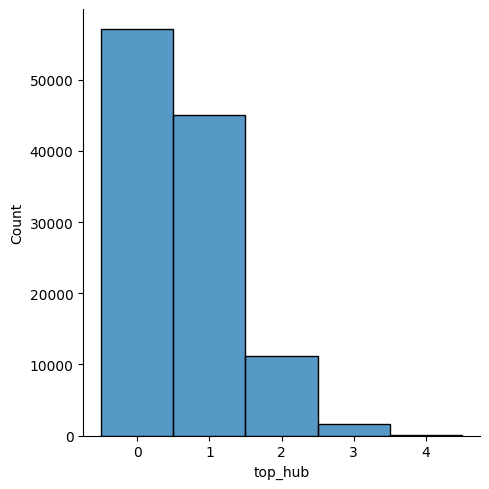

In [88]:
import seaborn as sns
sns.displot(fr, x="top_hub", discrete=True)

In [89]:
%%time

fr_top['top_hub_label'] = 0

for i in tqdm(fr_top.index):
    _list = []
    for j in tops:
        if j in fr_top['hubs'][i]:
            fr_top['top_hub'][i] += 1
            _list.append(j)
    if fr_top['top_hub'][i] == 0:
        fr_top['top_hub_label'][i] = ''
    elif fr['top_hub'][i] > 0:
        fr_top['top_hub_label'][i] = _list
        
fr_top

  0%|          | 0/57953 [00:00<?, ?it/s]

CPU times: user 19.6 s, sys: 1.39 s, total: 21 s
Wall time: 19.2 s


,id,title,time_published,tags,hubs,lemmatized_text,article,top_hub,top_hub_label
0,310000,'как 'мы 'неделя 'чинить 'compaction 'Cassandra\n,2016-09-17 06:11:00+00:00,"[cassandra, nosql, troubleshooting]","[sys_admin, dwh, devops]",основной хранилище метрика являться cassandra ...,'как 'мы 'неделя 'чинить 'compaction 'Cassandr...,2,[sys_admin]
1,310002,война гипервизор To be continued\n,2016-09-15 07:56:08+00:00,"[облачные вычисления, виртуализация, хостинг, ...","[it-infrastructure, virtualization, cloud_comp...",война гипервизор дело непрерывный наверное дей...,война гипервизор To be continued\nвойна гиперв...,2,[it-infrastructure]
3,310008,миф незрелость мобильный NFC технология\n,2016-09-15 08:02:54+00:00,"[Gemalto, nfc, мобильные приложения, мобильный...","[infosecurity, pay_system, ecommerce_development]",современный nfc технология нынешний вид появля...,миф незрелость мобильный NFC технология\nсовре...,2,[infosecurity]
4,310014,OpenJDK Project Panama\n,2016-09-15 06:30:51+00:00,"[joker2016, jokerconf, java, jvm, panama]","[programming, java]",год назад openjdk создавать новый проект кодов...,OpenJDK Project Panama\nгод назад openjdk созд...,2,[programming]
5,310022,PaaS DBaaS SaaS… что это значить\n,2016-09-14 16:41:35+00:00,"[saas, paas, облачные сервисы]","[it-infrastructure, cloud_computing, network_t...",последний несколько год английский язык появля...,PaaS DBaaS SaaS… что это значить\nпоследний не...,2,[it-infrastructure]
...,...,...,...,...,...,...,...,...,...
115031,773120,Microsoft временно заблокировать доступ сотруд...,2023-11-10 10:30:52+00:00,"[microsoft, ChatGPT]","[infosecurity, hr_management, cloud_services]",ноябрь год профильный сми сообщать microsoft в...,Microsoft временно заблокировать доступ сотруд...,4,"[infosecurity, hr_management]"
115032,773122,страна-датацентр корабль 10 000 Nvidia H100 хо...,2023-11-10 10:34:57+00:00,"[del complex, страна, дата-центр]",[machine_learning],весь мир говорить страна датацентр del complex...,страна-датацентр корабль 10 000 Nvidia H100 хо...,2,[machine_learning]
115034,773126,RecTools – OpenSource библиотека рекомендатель...,2023-11-10 11:07:30+00:00,"[Рекомендации, коллаборативная фильтрация, pyt...","[python, bigdata, machine_learning]",когда-либо работать рекомендательный система з...,RecTools – OpenSource библиотека рекомендатель...,4,"[machine_learning, python]"
115035,773128,в рф изучать возможность использование отпечат...,2023-11-10 11:08:56+00:00,"[биометрия, биометрические данные, биометричес...",[infosecurity],центр биометрический технология цбт эксперт из...,в рф изучать возможность использование отпечат...,2,[infosecurity]


In [90]:
%%time

fr_top['top_hub_label_1'] = 0

for i in tqdm(fr_top.index):
    fr_top['top_hub_label_1'][i] = fr_top['top_hub_label'][i][0]
        
fr_top

  0%|          | 0/57953 [00:00<?, ?it/s]

CPU times: user 999 ms, sys: 12.1 ms, total: 1.01 s
Wall time: 999 ms


,id,title,time_published,tags,hubs,lemmatized_text,article,top_hub,top_hub_label,top_hub_label_1
0,310000,'как 'мы 'неделя 'чинить 'compaction 'Cassandra\n,2016-09-17 06:11:00+00:00,"[cassandra, nosql, troubleshooting]","[sys_admin, dwh, devops]",основной хранилище метрика являться cassandra ...,'как 'мы 'неделя 'чинить 'compaction 'Cassandr...,2,[sys_admin],sys_admin
1,310002,война гипервизор To be continued\n,2016-09-15 07:56:08+00:00,"[облачные вычисления, виртуализация, хостинг, ...","[it-infrastructure, virtualization, cloud_comp...",война гипервизор дело непрерывный наверное дей...,война гипервизор To be continued\nвойна гиперв...,2,[it-infrastructure],it-infrastructure
3,310008,миф незрелость мобильный NFC технология\n,2016-09-15 08:02:54+00:00,"[Gemalto, nfc, мобильные приложения, мобильный...","[infosecurity, pay_system, ecommerce_development]",современный nfc технология нынешний вид появля...,миф незрелость мобильный NFC технология\nсовре...,2,[infosecurity],infosecurity
4,310014,OpenJDK Project Panama\n,2016-09-15 06:30:51+00:00,"[joker2016, jokerconf, java, jvm, panama]","[programming, java]",год назад openjdk создавать новый проект кодов...,OpenJDK Project Panama\nгод назад openjdk созд...,2,[programming],programming
5,310022,PaaS DBaaS SaaS… что это значить\n,2016-09-14 16:41:35+00:00,"[saas, paas, облачные сервисы]","[it-infrastructure, cloud_computing, network_t...",последний несколько год английский язык появля...,PaaS DBaaS SaaS… что это значить\nпоследний не...,2,[it-infrastructure],it-infrastructure
...,...,...,...,...,...,...,...,...,...,...
115031,773120,Microsoft временно заблокировать доступ сотруд...,2023-11-10 10:30:52+00:00,"[microsoft, ChatGPT]","[infosecurity, hr_management, cloud_services]",ноябрь год профильный сми сообщать microsoft в...,Microsoft временно заблокировать доступ сотруд...,4,"[infosecurity, hr_management]",infosecurity
115032,773122,страна-датацентр корабль 10 000 Nvidia H100 хо...,2023-11-10 10:34:57+00:00,"[del complex, страна, дата-центр]",[machine_learning],весь мир говорить страна датацентр del complex...,страна-датацентр корабль 10 000 Nvidia H100 хо...,2,[machine_learning],machine_learning
115034,773126,RecTools – OpenSource библиотека рекомендатель...,2023-11-10 11:07:30+00:00,"[Рекомендации, коллаборативная фильтрация, pyt...","[python, bigdata, machine_learning]",когда-либо работать рекомендательный система з...,RecTools – OpenSource библиотека рекомендатель...,4,"[machine_learning, python]",machine_learning
115035,773128,в рф изучать возможность использование отпечат...,2023-11-10 11:08:56+00:00,"[биометрия, биометрические данные, биометричес...",[infosecurity],центр биометрический технология цбт эксперт из...,в рф изучать возможность использование отпечат...,2,[infosecurity],infosecurity


In [91]:
fr_top.to_excel('fr_top.xlsx')

In [92]:
fr_top.to_csv('fr_top_csv.csv')

## Модели

### Модель с классификацией по одному лейблу

In [93]:
X = fr_top[['lemmatized_text']]
y = fr_top['top_hub_label_1']

X.shape

(57953, 1)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
X_train.shape, X_test.shape

((43464, 1), (14489, 1))

#### LogisticRegression

##### bow

In [96]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

vec = CountVectorizer() # подбор гиперпараметров очень помогает
vec.fit(X_train['lemmatized_text'])

bow = vec.transform(X_train['lemmatized_text'])  # bow — bag of words (мешок слов)
bow_test = vec.transform(X_test['lemmatized_text'])

print(bow.shape)

(43464, 458448)
CPU times: user 59 s, sys: 1.28 s, total: 1min
Wall time: 1min


In [97]:
%%time
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

CPU times: user 2.13 s, sys: 695 ms, total: 2.83 s
Wall time: 2.82 s


In [98]:
clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial', max_iter=1000, random_state=42, n_jobs = -1)

In [99]:
%%time
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

                   precision    recall  f1-score   support

    hr_management       0.81      0.80      0.80      1116
     infosecurity       0.73      0.90      0.81      3388
it-infrastructure       0.63      0.60      0.61      1516
       javascript       0.53      0.23      0.32       631
 machine_learning       0.77      0.73      0.75      1380
      open_source       0.69      0.30      0.42       635
      programming       0.57      0.75      0.65      3139
           python       0.57      0.28      0.37       705
        sys_admin       0.58      0.39      0.47       836
           webdev       0.66      0.50      0.57      1143

         accuracy                           0.67     14489
        macro avg       0.65      0.55      0.58     14489
     weighted avg       0.66      0.67      0.65     14489

CPU times: user 1.64 s, sys: 3.54 s, total: 5.19 s
Wall time: 5min 9s


##### TF-IDF

In [100]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec_train = vec.fit_transform(X_train['lemmatized_text'])
vec_test = vec.transform(X_test['lemmatized_text'])

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

CPU times: user 37 s, sys: 1.64 s, total: 38.7 s
Wall time: 38.7 s


In [101]:
%%time
clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial', max_iter=1000, random_state=42, n_jobs = -1)
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(classification_report(y_test, pred_tfidf))

                   precision    recall  f1-score   support

    hr_management       0.81      0.85      0.83      1116
     infosecurity       0.86      0.88      0.87      3388
it-infrastructure       0.64      0.66      0.65      1516
       javascript       0.52      0.36      0.43       631
 machine_learning       0.77      0.80      0.79      1380
      open_source       0.69      0.40      0.51       635
      programming       0.62      0.75      0.68      3139
           python       0.61      0.41      0.49       705
        sys_admin       0.56      0.52      0.54       836
           webdev       0.66      0.56      0.61      1143

         accuracy                           0.71     14489
        macro avg       0.67      0.62      0.64     14489
     weighted avg       0.70      0.71      0.70     14489

CPU times: user 1.52 s, sys: 3.36 s, total: 4.88 s
Wall time: 4min 14s


##### W2Vec

In [102]:
# !pip install transformers

Looking in indexes: https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 98.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.0 MB/s eta 0:00:00


In [135]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.7 MB/s eta 0:00:00a 0:00:01
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.7 MB/s eta 0:00:00a 0:00:01
INFO:

In [110]:
!pip install torch

Looking in indexes: https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 1.9 MB/s eta 0:00:000:00:0100:01


In [1]:
import transformers as ppb
import torch

In [2]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [118]:
from gensim.models import word2vec

In [119]:
tokenized_ = [i.split() for i in fr_top['lemmatized_text'].values]

%time w2v = word2vec.Word2Vec(tokenized_, workers=4, vector_size=200, min_count=10, window=3, sample=1e-3)

CPU times: user 12min 29s, sys: 12.1 s, total: 12min 41s
Wall time: 3min 27s


In [120]:
w2v.wv.most_similar(positive=['плюс'], topn=10)

[('минус', 0.8484389781951904),
 ('преимущество', 0.6751542687416077),
 ('недостаток', 0.6578919291496277),
 ('достоинство', 0.6275618076324463),
 ('профит', 0.5190838575363159),
 ('во-вторых', 0.5104820132255554),
 ('зато', 0.5076562166213989),
 ('во-первых', 0.498101145029068),
 ('несомненный', 0.49752572178840637),
 ('смотря', 0.49089616537094116)]

In [121]:
def get_text_embedding(lemmas, model=w2v.wv, embedding_size=200):
    
    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [123]:
%%time
#X_train, X_test
X_train['w2v_embedding'] = X_train['lemmatized_text'].map(get_text_embedding)
X_test['w2v_embedding'] = X_test['lemmatized_text'].map(get_text_embedding)

CPU times: user 3min 31s, sys: 1.26 s, total: 3min 33s
Wall time: 3min 34s


In [125]:
clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial', max_iter=1000, random_state=42, n_jobs = -1)
clf.fit(list(X_train['w2v_embedding'].values), y_train)

pred = clf.predict(list(X_test['w2v_embedding'].values))
#print(accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

                   precision    recall  f1-score   support

    hr_management       0.88      0.79      0.83      1233
     infosecurity       0.86      0.85      0.86      3425
it-infrastructure       0.62      0.61      0.62      1550
       javascript       0.33      0.50      0.40       424
 machine_learning       0.80      0.76      0.78      1449
      open_source       0.37      0.59      0.45       394
      programming       0.72      0.60      0.66      3746
           python       0.40      0.58      0.47       481
        sys_admin       0.47      0.51      0.49       775
           webdev       0.55      0.62      0.58      1012

         accuracy                           0.69     14489
        macro avg       0.60      0.64      0.61     14489
     weighted avg       0.71      0.69      0.69     14489



##### FastText

In [129]:
!pip install fasttext

Looking in indexes: https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/packages/packages/06/55/9f73c32dda93fa4f539fafa268f9504e83c489f460c380371d94296126cd/pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3350799 sha256=66ba42bcd680d95d92664975981666db0d8d1e4ccc1fe7f29924f4cde96726d5
  Stored in directory: /home/nmakhanova/.cache/pip/wheels/8e/63/a3/291dbfff3e15bd53067d3dda52355e640cb83ac02c3f504fa8
Successfully built fasttext


In [132]:
import fasttext
import fasttext.util
fasttext.util.download_model('ru', if_exists='ignore')

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (100.00%) [=================================================> ]================================================> ]=================================================> ]==================================================>]


'cc.ru.300.bin'

In [133]:
ft = fasttext.load_model('cc.ru.300.bin')

In [134]:
X_train['ft_embedding'] = X_train['lemmatized_text'].apply(lambda x: get_text_embedding(x, model=ft, embedding_size=300))
print('train done')

X_test['ft_embedding'] = X_test['lemmatized_text'].apply(lambda x: get_text_embedding(x, model=ft, embedding_size=300))

KeyboardInterrupt: 

In [ ]:
%%time
clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial', max_iter=1000, random_state=42, n_jobs = -1)
clf.fit(list(X_train['ft_embedding'].values), y_train)

pred = clf.predict(list(X_test['ft_embedding'].values))
print(classification_report(pred, y_test))

#### SVM

In [115]:
# import re
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# from collections import Counter


# ss = SnowballStemmer('russian')
# sw = stopwords.words('russian')

# def split_tokens(row):
#     row['all_tokens'] = [ss.stem(i) for i in
#                          re.split(r" +",
#                          re.sub(r"[^a-z@# ]", "",
#                          row['tweet'].lower()))
#                          if (i not in sw) and len(i)]
#     return row

# def get_info(dataset):
#     counts = Counter([i for s in dataset['train']['all_tokens'] for i in s])
#     counts = {k:v for k, v in counts.items() if v>10}
#     vocab = list(counts.keys())
#     n_v = len(vocab)
#     id2tok = dict(enumerate(vocab))
#     tok2id = {token: id for id, token in id2tok.items()}

#     return counts, vocab, n_v, id2tok, tok2id

# def remove_rare_tokens(row, vocab):
#     row['tokens'] = [t for t in row['all_tokens'] if t in vocab]
#     return row

# def windowizer(row, tok2id, wsize=3):
#     """
#     Windowizer function for Word2Vec. Converts sentence to sliding-window
#     pairs.
#     """
#     doc = row['tokens']
#     wsize = 3
#     out = []
#     for i, wd in enumerate(doc):
#         target = tok2id[wd]
#         window = [i+j for j in
#                   range(-wsize, wsize+1, 1)
#                   if (i+j >= 0) &
#                      (i+j < len(doc)) &
#                      (j != 0)]

#         out+=[(target, tok2id[doc[w]]) for w in window]
#     row['moving_window'] = out
#     return row

## Модель

#### BOW

In [21]:
big_frame_only_text.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77579 entries, 0 to 77578
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               77579 non-null  int64  
 1   is_corporative   77579 non-null  bool   
 2   posttype         77579 non-null  object 
 3   title            77579 non-null  object 
 4   hubs_pro         77579 non-null  object 
 5   hubs_nopro       77579 non-null  object 
 6   tags             77579 non-null  object 
 7   time_published   77579 non-null  object 
 8   bookmarks        77579 non-null  int64  
 9   comments_count   77579 non-null  int64  
 10  views            77579 non-null  int64  
 11  votes            77579 non-null  int64  
 12  possitive_votes  77579 non-null  int64  
 13  negative_votes   77579 non-null  int64  
 14  reading_time     77579 non-null  float64
 15  lang             77579 non-null  object 
 16  author_name      77579 non-null  object 
 17  author_id   

In [22]:
X = big_frame_only_text[['text']]
y = big_frame_only_text['hub_class']

X.shape

(77579, 1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
X_train.shape, X_test.shape

((58184, 1), (19395, 1))

In [25]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

vec = CountVectorizer() # подбор гиперпараметров очень помогает
vec.fit(X_train['text'])

bow = vec.transform(X_train['text'])  # bow — bag of words (мешок слов)
bow_test = vec.transform(X_test['text'])

print(bow.shape)

# scaler = MaxAbsScaler()
# bow = scaler.fit_transform(bow)
# bow_test = scaler.transform(bow_test)

# clf = LogisticRegression(max_iter=200, random_state=42)
# clf.fit(bow, y_train)
# pred = clf.predict(bow_test)

# print(classification_report(y_test, pred))

(58184, 1039242)
CPU times: user 1min 46s, sys: 2.72 s, total: 1min 48s
Wall time: 1min 49s


In [26]:
%%time
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

CPU times: user 5.45 s, sys: 1.28 s, total: 6.73 s
Wall time: 6.73 s


In [27]:
clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial', max_iter=1000, random_state=42, n_jobs = -1)

In [28]:
%%time
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}

#### TF-IDF

In [86]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec_train = vec.fit_transform(X_train['text'])
vec_test = vec.transform(X_test['text'])

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

#clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial', max_iter=1000, random_state=42, n_jobs = -1)
#clf.fit(vec_train, y_train)
#pred_tfidf = clf.predict(vec_test)
#print(classification_report(y_test, pred_tfidf))

CPU times: total: 3.03 s
Wall time: 5.68 s


In [87]:
clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial', max_iter=1000, random_state=42, n_jobs = -1)
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

         0.0       0.18      0.90      0.30        68
         1.0       0.25      0.71      0.37        68
         2.0       0.50      0.85      0.63        55
         3.0       0.24      0.64      0.35        28
         4.0       0.17      0.37      0.23        30
         5.0       0.80      0.24      0.36        17
         6.0       0.15      0.09      0.11        23
         7.0       0.17      0.14      0.15        22
         8.0       0.50      0.15      0.23        20
         9.0       0.50      0.26      0.34        19
        10.0       0.32      0.38      0.34        16
        11.0       0.62      0.40      0.49        25
        12.0       0.43      0.38      0.40        16
        13.0       0.50      0.12      0.20        16
        14.0       0.45      0.60      0.51        15
        15.0       0.40      0.13      0.20        15
        16.0       0.00      0.00      0.00        10
        17.0       0.50    